# Workshop: Optimization
**Part I**

In this coding exercise, we try to program up

* Gradient Descent

algorithms use logistic regression as an example.

---

In [1]:
# import necessary packages
import numpy as np
import matplotlib.pyplot as plt

## Logistic Regression

Logistic regression is one of the most fundamental method in machine learning.
Consider data set $\{a_i, y_i\}_{i=1}^m$, where $a_i \in \mathbb{R}^n$ is the data point and
$y_i \in \{0, 1\}$ is the corresponding label.

Our goal is to train a classifer $x \in \mathbb{R}^n$, such that the sign of $\langle a_i,x \rangle$ will indicate which class of $a_i$ belongs to, 0 or 1.
In order to do that following optimization problem are often considered,
$$
\min_x ~~\sum_{i=1}^m [\ln(1 + \exp(\langle a_i, x \rangle)) - y_i\langle a_i, x \rangle].
$$
And we will consider different variations of it though the workshop.
For more details of the derivation of the objective please check the lecture notes.

**Data Set**: We use MNIST 0 and 1 digits as the example data set, for more details please check [MNIST](http://yann.lecun.com/exdb/mnist/).

In [2]:
# load data
train_images = np.load('../data/train_images.npy')
train_labels = np.load('../data/train_labels.npy')
test_images = np.load('../data/test_images.npy')
test_labels = np.load('../data/test_labels.npy')

num_train_images = train_labels.size
num_test_images = test_labels.size
image_size = 28*28

print('number of training images: %i' % num_train_images)
print('number of testing images: %i' % num_test_images)

number of training images: 1000
number of testing images: 200


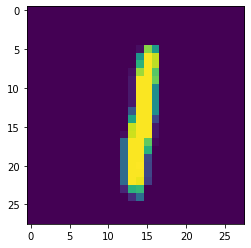

In [3]:
plt.imshow(train_images[2].reshape(28, 28))

## Gradient Descent

Recall that if we consider a $\beta$-smooth objective $f$, and want to solve the optimizatoin problem,
$$
\min_{x}~~f(x)
$$
the gradient descend algorithm can be specify as,

* input: $x_0$
* set $k = 0$
* while $\|\nabla f(x_k)\| \ge $ tolerance
\begin{align*}
x_{k+1} &\leftarrow x_k - \frac{1}{\beta} \nabla f(x_k)\\
k &\leftarrow k + 1
\end{align*}
end
* output: $x_k$ 

Now let us consider the algorithm in the context of logistic regression, where,
$$
f(x) = \sum_{i=1}^m [\ln(1 + \exp(\langle a_i, x \rangle)) - y_i\langle a_i, x \rangle] + \frac{\lambda}{2} \|x\|^2.
$$

Moreover,
$$
\nabla f(x) = \sum_{i=1}^m \frac{\exp(\langle a_i, x \rangle)}{1 + \exp(\langle a_i, x \rangle)} a_i - y_i a_i + \lambda x, \quad
\nabla^2 f(x) = \sum_{i=1}^m \frac{\exp(\langle a_i, x \rangle)}{(1+\exp(\langle a_i, x \rangle))^2} a_i a_i^\top + \lambda I.
$$

And since
$$
\frac{z}{(1+z)^2} \le \frac{1}{4}, \quad \forall z \ge 0,
$$
we have,
$$
\|\nabla^2 f(x)\| \le \frac{1}{4}\|A\|^2 + \lambda
$$
where $A = [a_1, a_2, \ldots, a_m]$. Therefore we could set our $\beta = \frac{1}{4}\|A\|^2 + \lambda$.

In [4]:
# function, gradient and Lipschitz constant
A = train_images
y = train_labels
lam = 0.1

beta = 0.25*np.linalg.norm(A, 2)**2 + lam

def func(x):
    z = A.dot(x)
    return np.sum(np.log(1.0 + np.exp(z)) - y*z) + 0.5*lam*np.sum(x**2)

def grad(x):
    z = A.dot(x)
    return A.T.dot(np.exp(z)/(1.0 + np.exp(z)) - y) + lam*x

In [5]:
# gradient descend algorithm
def optimizeWithGD(x0, func, grad, beta, tol=1e-6, max_iter=1000):
    """
    Optimize with Gradient Descent
        min_x f(x)
    where f is beta smooth.

    input
    -----
    x0 : array_like
        Starting point for the solver.
    func : function
        Input x and return the function value.
    grad : function
        Input x and return the gradient.
    beta : float
        beta smoothness constant
    tol : float, optional
        Gradient tolerance for terminating the solver.
    max_iter : int, optional
        Maximum number of iteration for terminating the solver.
        
    output
    ------
    x : array_like
        Final solution
    obj_his : array_like
        Objective function value convergence history
    err_his : array_like
        Norm of gradient convergence history
    exit_flag : int
        0, norm of gradient below `tol`
        1, exceed maximum number of iteration
        2, others
    """
    # initial information
    x = np.copy(x0)
    g = grad(x)
    step_size = 1.0/beta
    #
    obj = func(x)
    err = np.linalg.norm(g)
    #
    obj_his = np.zeros(max_iter + 1)
    err_his = np.zeros(max_iter + 1)
    #
    obj_his[0] = obj
    err_his[0] = err
    
    # start iterations
    iter_count = 0
    while err >= tol:
        # gradient descent step
        x -= step_size*g
        #
        # update function and gradient
        g = grad(x)
        #
        obj = func(x)
        err = np.linalg.norm(g)
        #
        iter_count += 1
        obj_his[iter_count] = obj
        err_his[iter_count] = err
        #
        # check if exceed maximum number of iteration
        if iter_count >= max_iter:
            print('gradient descent reach maximum number of iteration.')
            return x, obj_his[:iter_count+1], err_his[:iter_count+1], 1
    #
    return x, obj_his[:iter_count+1], err_his[:iter_count+1], 0

In [6]:
# apply the algorithm
x0 = np.zeros(image_size)

x, obj_his, err_his, exit_flag = optimizeWithGD(x0, func, grad, beta)

gradient descent reach maximum number of iteration.


Text(0.5, 0.98, 'Gradient Descent on Logistic Regression')

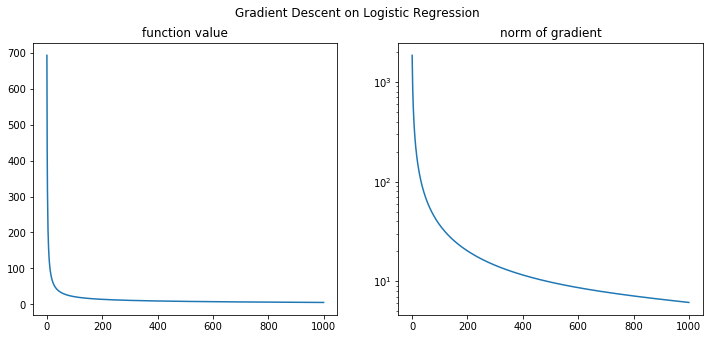

In [7]:
# plot convergence result
fig, ax = plt.subplots(1, 2, figsize=(12,5))
ax[0].plot(obj_his)
ax[0].set_title('function value')
ax[1].semilogy(err_his)
ax[1].set_title('norm of gradient')
fig.suptitle('Gradient Descent on Logistic Regression')

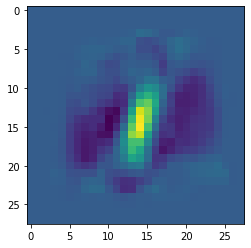

In [8]:
# plot the identifier
plt.imshow(x.reshape(28, 28))

In [9]:
# test result
A_test = test_images
y_test = test_labels

z_test = A_test.dot(x)

rate = np.sum(((z_test < 0.0) & (y_test == 0.0)) | ((z_test > 0.0) & (y_test == 1.0)))/num_test_images

print('correctly classify %0.2f of the testing data.' % rate)

correctly classify 1.00 of the testing data.
